In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
# LSTM 셀을 사용한 순환층
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 40ms/step - loss: 0.6922 - accuracy: 0.5508 - val_loss: 0.6914 - val_accuracy: 0.5946
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6900 - accuracy: 0.6120 - val_loss: 0.6883 - val_accuracy: 0.6226
Epoch 3/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6854 - accuracy: 0.6326 - val_loss: 0.6816 - val_accuracy: 0.6430
Epoch 4/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6727 - accuracy: 0.6463 - val_loss: 0.6553 - val_accuracy: 0.6432
Epoch 5/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6228 - accuracy: 0.6795 - val_loss: 0.5951 - val_accuracy: 0.7216
Epoch 6/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5768 - accuracy: 0.7432 - val_loss: 0.5670 - val_accuracy: 0.7438
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5508 - accuracy: 0.7544 - val_loss: 0.5469 - val_ac

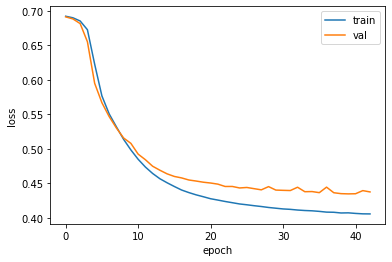

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6924 - accuracy: 0.5420 - val_loss: 0.6916 - val_accuracy: 0.5908
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6901 - accuracy: 0.6041 - val_loss: 0.6886 - val_accuracy: 0.6372
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6839 - accuracy: 0.6457 - val_loss: 0.6781 - val_accuracy: 0.6488
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6483 - accuracy: 0.6664 - val_loss: 0.6166 - val_accuracy: 0.7126
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5979 - accuracy: 0.7261 - val_loss: 0.5882 - val_accuracy: 0.7324
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5739 - accuracy: 0.7404 - val_loss: 0.5682 - val_accuracy: 0.7446
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5538 - accuracy: 0.7528 - val_loss: 0.5460 - val_ac

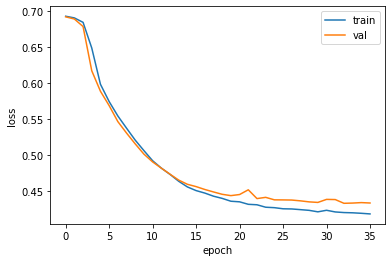

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 30s 81ms/step - loss: 0.6925 - accuracy: 0.5400 - val_loss: 0.6916 - val_accuracy: 0.5924
Epoch 2/100
313/313 [==============================] - 24s 75ms/step - loss: 0.6896 - accuracy: 0.5995 - val_loss: 0.6861 - val_accuracy: 0.6392
Epoch 3/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6737 - accuracy: 0.6472 - val_loss: 0.6476 - val_accuracy: 0.6774
Epoch 4/100
313/313 [==============================] - 24s 76ms/step - loss: 0.5986 - accuracy: 0.6974 - val_loss: 0.5624 - val_accuracy: 0.7276
Epoch 5/100
313/313 [==============================] - 24s 78ms/step - loss: 0.5465 - accuracy: 0.7340 - val_loss: 0.5310 - val_accuracy: 0.7400
Epoch 6/100
313/313 [==============================] - 24s 76ms/step - loss: 0.5170 - accuracy: 0.7559 - val_loss: 0.5038 - val_accuracy: 0.7556
Epoch 7/100
313/313 [==============================] - 24s 77ms/step - loss: 0.5007 - accuracy: 0.7628 - val_loss: 0.4887 - val_ac

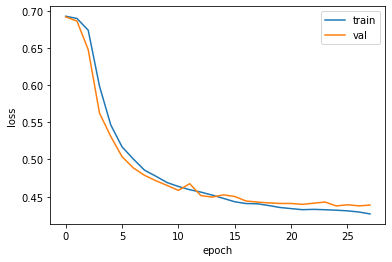

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 45ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6923 - val_accuracy: 0.5234
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6908 - accuracy: 0.5562 - val_loss: 0.6899 - val_accuracy: 0.5552
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6877 - accuracy: 0.5824 - val_loss: 0.6861 - val_accuracy: 0.5776
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6824 - accuracy: 0.6118 - val_loss: 0.6797 - val_accuracy: 0.5992
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6731 - accuracy: 0.6323 - val_loss: 0.6686 - val_accuracy: 0.6232
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6569 - accuracy: 0.6532 - val_loss: 0.6483 - val_accuracy: 0.6560
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6260 - accuracy: 0.6801 - val_loss: 0.6076 - val_ac

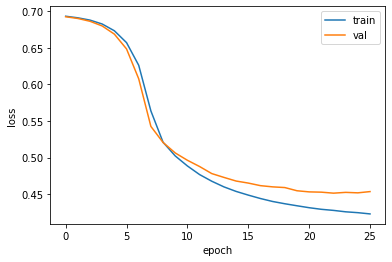

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(val_seq, val_target)

157/157 [==============================] - 4s 16ms/step - loss: 0.4387 - accuracy: 0.8024


[0.43866676092147827, 0.8023999929428101]